# Data preprocessing

In [12]:
import numpy as np
import torch
import pandas as pd

import matplotlib.pyplot as plt
import enum

import os
from PIL import Image
import cv2 #pip install opencv-python
import torchvision.transforms as transforms
import matplotlib.image as mpimg

## Path things :)

In [13]:
PATHbirdsWithBackground = "just-bird-data/withBackground"
PATHbirdsWithoutBackground = "just-bird-data/withoutBackground"
PATHfeeder = "feeder-data"

class Birds(enum.Enum):
    BLUETIT = "blueTit"
    CHAFFINCH = "chaffinch"
    COALTIT = "coalTit"
    GOLDFINCH = "goldfinch"
    GREATTIT = "greatTit"
    ROBIN = "robin"
    STARLING = "starling"

    def __str__(self) -> str:
        return super().value

## Resizing images to 224x224 px

Note: the feeder images are already 224 x 224 px

In [14]:
#path = '/your/images/folder/', 
def resize(path, width, height):
	dirs = os.listdir( path )
	for item in dirs: #dirs is not defined mby dirs = os.listdir( path )
		if os.path.isfile(path + item):
			img = Image.open(path + item)
			new_image = img.resize((width, height))
			# new_file_name = 'resized-' + str(width) + "-" + item
			# new_image.save(path + new_file_name)
			new_image.save(path + item)

In [ ]:
for bird in Birds:
    resize(PATHbirdsWithoutBackground + "/" + bird.value + "/" , 224, 224)
    resize(PATHbirdsWithBackground + "/" + bird.value + "/" , 224, 224)

In [11]:
# remove the prev resized files where we saved them as new files
for bird in Birds:
    path =  PATHbirdsWithBackground + "/" + bird.value + "/" 
    dirs = os.listdir( path )
    for item in dirs:
        if os.path.isfile(path + item):
            if "resized" in item:
                os.remove(path+item)

## Display image (plt)

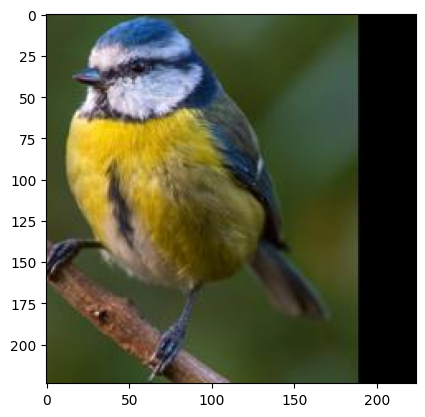

In [16]:
plt.figure()
first = PATHbirdsWithBackground + "/" + str(Birds.BLUETIT) + "/(1).jpg"

# Read Images
img = mpimg.imread(first)
 
# Output Images
plt.imshow(img)

def simpleShowImage(img_path):
    plt.figure()
    plt.imshow(mpimg.imread(img_path))

## Convert image to tensor


### Using cv2

(224, 224, 3)
tensor([[[0.2314, 0.2314, 0.2314,  ..., 0.0000, 0.0000, 0.0000],
         [0.2314, 0.2314, 0.2314,  ..., 0.0000, 0.0000, 0.0000],
         [0.2314, 0.2314, 0.2314,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.2235, 0.2235, 0.2235,  ..., 0.0000, 0.0000, 0.0000],
         [0.2235, 0.2235, 0.2235,  ..., 0.0000, 0.0000, 0.0000],
         [0.2235, 0.2235, 0.2235,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.2863, 0.2863, 0.2863,  ..., 0.0000, 0.0000, 0.0000],
         [0.2863, 0.2863, 0.2863,  ..., 0.0000, 0.0000, 0.0000],
         [0.2863, 0.2863, 0.2863,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.2745, 0.2745, 0.2745,  ..., 0.0000, 0.0000, 0.0000],
         [0.2745, 0.2745, 0.2745,  ..., 0.0000, 0.0000, 0.0000],
         [0.2745, 0.2745, 0.2745,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.1490, 0.1490, 0.1490,  ..., 0.0000, 0.0000, 0.0000],
         [0.1490, 0.1490, 0.1490,  ..., 0.0000, 0.0000, 0.0000],
         [0.1490, 0.1490, 0.1490,  ..., 0.00

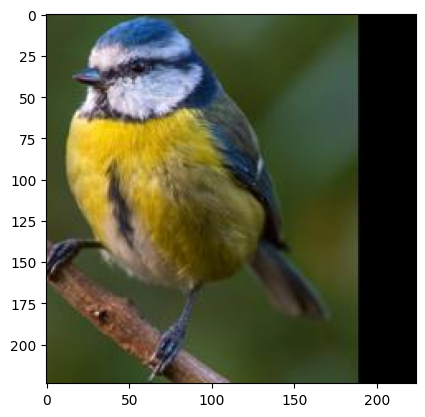

In [15]:
image = cv2.imread(first)

# Convert BGR image to RGB image
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print(image.shape)
plt.imshow(image)
# Define a transform to convert the image to torch tensor
transform = transforms.Compose([
    transforms.ToTensor()
])
# Convert the image to Torch tensor
tensor = transform(image)
# print the converted image tensor
print(tensor)
print(tensor.shape)

def cv2ReadImageToTensor(img_path):
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    transform = transforms.Compose([transforms.ToTensor()])
    tensor = transform(image)
    return tensor